<a href="https://colab.research.google.com/github/Siskanti/Prediksi-Berat-Ikan-Menggunakan_Linear_Regression/blob/main/Prediksi_Breat_Ikan_dengan_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***NAMA : SISKANTI***

***NIM : H071201064***

***PRODI : SISTEM INFORMASI***

***UAS MACHINE LEARNING***

# PREDIKSI BERAT IKAN MENGGUNAKAN LINEAR REGRESSION

In [1]:
#Library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data_fish= pd.read_csv("drive/MyDrive/Machine Learning/Fish.csv")

In [3]:
data_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


Deskripsi setiap kolom :
*   Species : nama species ikan
*   Weight : berat ikan dalam gram
*   Length1 : panjang vertikan dalam cm
*   Length2 : panjang diagonal dalam cm
*   Length3 : panjang silang dalam cm
*   Heigth : tinggi dalam cm
*   Width : lebar diagonal dalam cm

Variabel dependennya yaitu 'Weight'. Variabel independennya yaitu 'Species','Length1','Length2','Length3','Height', dan 'Width'.




In [4]:
#Mengecek kolom yang ada pada dataset
column_names = data_fish.columns
column_names

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [5]:
data_fish.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [6]:
#Mengecek statistik data
data_fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
#mengecek atribut yang ada dapa setiap kolom
for i in data_fish:
  print("Attribute :",i)
  print(data_fish[i].value_counts())
  print()

Attribute : Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Attribute : Weight
300.0     6
1000.0    5
500.0     5
120.0     5
700.0     5
         ..
60.0      1
55.0      1
800.0     1
306.0     1
19.9      1
Name: Weight, Length: 101, dtype: int64

Attribute : Length1
19.0    6
20.0    5
22.0    4
20.5    4
25.4    3
       ..
33.7    1
25.6    1
24.1    1
22.1    1
13.2    1
Name: Length1, Length: 116, dtype: int64

Attribute : Length2
22.0    7
35.0    6
22.5    5
40.0    5
21.0    4
       ..
19.6    1
21.3    1
22.7    1
24.6    1
14.3    1
Name: Length2, Length: 93, dtype: int64

Attribute : Length3
23.5    5
25.0    3
22.5    3
34.0    3
45.5    3
       ..
27.9    1
26.8    1
26.7    1
27.2    1
15.2    1
Name: Length3, Length: 124, dtype: int64

Attribute : Height
11.1366    2
5.6925     2
2.2139     2
6.1100     2
9.6000     2
          ..
8.8768     1
8.5680     1
9.4850   

In [8]:
#ukuran baris dan kolom
data_fish.shape

(159, 7)

In [9]:
#cek tipe data setiap kolom
for i in data_fish:
  print(f"{i} bertipe data {data_fish[i].dtypes}")

Species bertipe data object
Weight bertipe data float64
Length1 bertipe data float64
Length2 bertipe data float64
Length3 bertipe data float64
Height bertipe data float64
Width bertipe data float64


In [10]:
#membagi data yang bersifat numerik dan categoric
numeric = ['Weight', 'Length1','Length2', 'Length3','Height','Width']
categorical = ['Species']

## Missing Value

In [11]:
#Mengecek nilai yang kosong
data_fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [12]:
data_fish.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


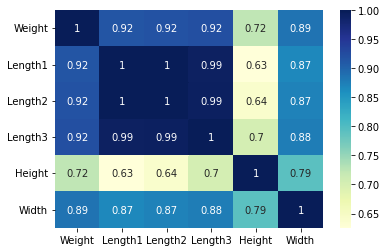

In [13]:
sns.heatmap(data_fish.corr(), annot=True, cmap='YlGnBu');

## Check dan Menangani Outlier

Mengecek data pencilan serta menanganinya

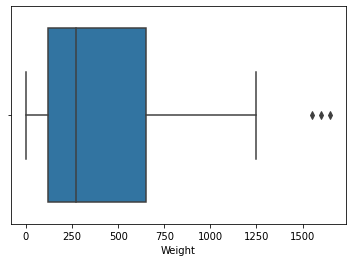

In [14]:
sns.boxplot(x=data_fish['Weight']);

In [15]:
dfw = data_fish['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [16]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

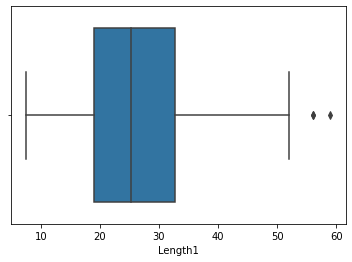

In [17]:
sns.boxplot(x=data_fish['Length1']);

In [18]:
df1 = data_fish['Length1']
df1_Q1 = df1.quantile(0.25)
df1_Q3 = df1.quantile(0.75)
df1_IQR = df1_Q3 - df1_Q1
df1_lowerend = df1_Q1 - (1.5 * df1_IQR)
df1_upperend = df1_Q3 + (1.5 * df1_IQR)

df1_outliers = df1[(df1 < df1_lowerend) | (df1 > df1_upperend)]
df1_outliers

142    56.0
143    56.0
144    59.0
Name: Length1, dtype: float64

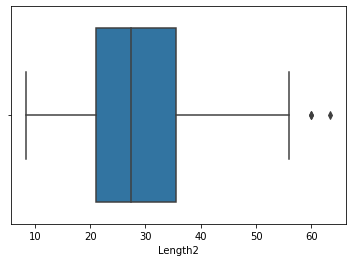

In [19]:
sns.boxplot(x=data_fish['Length2']);

In [20]:
dfL2 = data_fish['Length2']
dfL2_Q1 = dfL2.quantile(0.25)
dfL2_Q3 = dfL2.quantile(0.75)
dfL2_IQR = dfL2_Q3 - dfL2_Q1
dfL2_lowerend = dfL2_Q1 - (1.5 * dfL2_IQR)
dfL2_upperend = dfL2_Q3 + (1.5 * dfL2_IQR)

dfL2_outliers = dfL2[(dfL2 < dfL2_lowerend) | (dfL2 > dfL2_upperend)]
dfL2_outliers

142    60.0
143    60.0
144    63.4
Name: Length2, dtype: float64

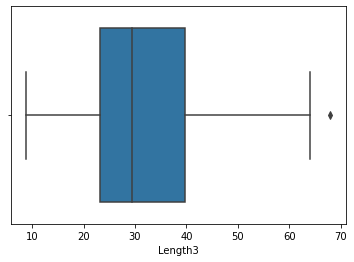

In [21]:
sns.boxplot(x=data_fish['Length3']);

In [22]:
dfL3 = data_fish['Length3']
dfL3_Q1 = dfL3.quantile(0.25)
dfL3_Q3 = dfL3.quantile(0.75)
dfL3_IQR = dfL3_Q3 - dfL3_Q1
dfL3_lowerend = dfL3_Q1 - (1.5 * dfL3_IQR)
dfL3_upperend = dfL3_Q3 + (1.5 * dfL3_IQR)

dfL3_outliers = dfL3[(dfL3 < dfL3_lowerend) | (dfL3 > dfL3_upperend)]
dfL3_outliers

144    68.0
Name: Length3, dtype: float64

In [23]:
data_fish[142:145]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


Menganalisis ulang setelah menghilangkan outlier

In [24]:
data_out = data_fish.drop([142,143,144])
data_out.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
Length1,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
Length2,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
Length3,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


## Encoding Categorical Data

In [25]:
#Mengubah data yang bersifat categorik ke numerik
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data_fish["Species"]=label_encoder.fit_transform(data_fish["Species"])
data_fish["Species"].unique()

array([0, 4, 6, 1, 2, 3, 5])

In [26]:
data_fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [27]:
#Memisakhan variabel dependen dan independen
y = data_fish['Weight'] #variabel dependen
x = data_fish.iloc[:,2:7] #variabel independen

In [28]:
y = data_fish['Weight'] 
x = data_fish.iloc[:,2:7] 

## MODEL

In [29]:
#Membagi dataset menjadi data train dan data test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=15)

In [30]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

### RUMUS MODEL LINEAR REGRESSION

*y = b0 + b1X1 + b2X2 + b3X3 + ... + bnXn*

*y : Variabel dependen*

*b0 : Konstan*

*b1 - bn : Koefisien*

*X1 - Xn : Variabel bebas*

In [31]:
print('Model intercept: ', reg.intercept_) 
print('Model coefficients: ', reg.coef_) 

Model intercept:  -493.0243262195845
Model coefficients:  [ 71.81625213 -14.03935323 -32.43759798  29.67836374  33.30924219]


In [32]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -493.02 + 71.82*X1 -14.04*X2 -32.44*X3 + 29.68*X4 + 33.31*X5


### Memprediksi Bobot

In [33]:
#Memprediksi Bobot dari Train Dataset
y_head = reg.predict(x_train)

In [34]:
#Menganalisis Kesuksesan Model dari Train Dataset dan Prediksi
#R2_score adalah sebuah nilai yang menyatakan seberapa sesuai hasil prediksi model mendekati data yang sebenarnya
r2_score(y_train, y_head) 

0.8843668543921711

In [35]:
#Menggunakan Trained Model dan Test Dataset untuk Memperkirakan Bobot
y_pred = reg.predict(x_test)

In [36]:
#Menganalisis Keberhasilan Trained Model dari Test Dataset dan Prediksi
print(r2_score(y_test, y_pred))

0.882924045549674


In [37]:
#Estimasi Prediksi Berat
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated Weight'])
y_pred1.head()

,Estimated Weight
0,-84.747170
1,95.629415
2,147.913086
3,799.060369
4,768.288990


In [38]:
#Berat nyata
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,19.7
1,90.0
2,0.0
3,955.0
4,650.0


In [39]:
#Membandingkan berat nyata dan prediksi
y_Perbandingan = pd.concat([y_test1, y_pred1], axis=1)
y_Perbandingan

,Weight,Estimated Weight
0,19.7,-84.747170
1,90.0,95.629415
2,0.0,147.913086
3,955.0,799.060369
4,650.0,768.288990
5,40.0,-37.053773
6,300.0,427.634633
7,1600.0,1099.882604
8,840.0,740.329873
9,725.0,659.822906


## Visualisasi Prediksi

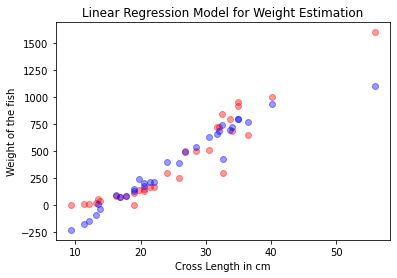

In [40]:
plt.scatter(x_test['Length1'], y_test, color='red', alpha=0.4)
plt.scatter(x_test['Length1'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

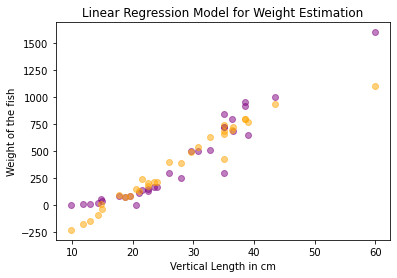

In [41]:
plt.scatter(x_test['Length2'], y_test, color='purple', alpha=0.5)
plt.scatter(x_test['Length2'], y_pred, color='orange', alpha=0.5)
plt.xlabel('Vertical Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

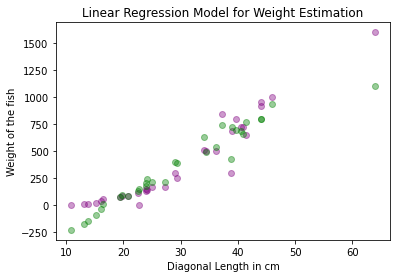

In [43]:
plt.scatter(x_test['Length3'], y_test, color='purple', alpha=0.4)
plt.scatter(x_test['Length3'], y_pred, color='green', alpha=0.4)
plt.xlabel('Diagonal Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

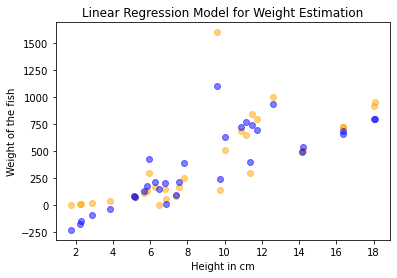

In [44]:
plt.scatter(x_test['Height'], y_test, color='orange', alpha=0.5)
plt.scatter(x_test['Height'], y_pred, color='blue', alpha=0.5)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');

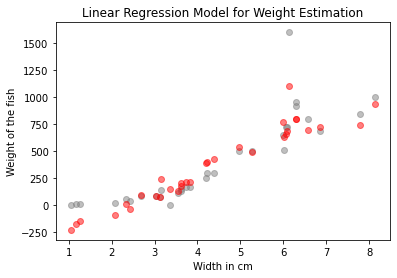

In [45]:
plt.scatter(x_test['Width'], y_test, color='gray', alpha=0.5)
plt.scatter(x_test['Width'], y_pred, color='red', alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation');